# **Laptop Dataset**

**Uncleaned Laptop Price dataset**

The Uncleaned Laptop Price dataset is a collection of laptop product listings scraped from an online e-commerce website. The dataset includes information about various laptop models, such as their brand, screen size, processor, memory, storage capacity, operating system, and price. However, the dataset is uncleaned, meaning that it contains missing values, inconsistent formatting, and other errors that need to be addressed before the data can be used for analysis or modeling.

The dataset contains both categorical and numerical variables, with the majority of variables being categorical, including brand, model name, screen resolution, processor type, and operating system. Some numerical variables include screen size, memory, and storage capacity. The target variable in the dataset is the price, which is a continuous variable.

The dataset contains over 1,300 laptop listings, making it a reasonably sized dataset for analysis and modeling. The dataset may be useful for machine learning projects related to predicting the price of a laptop based on its specifications. However, before using the dataset, it would be necessary to clean and preprocess the data to address the inconsistencies and missing values.

**Reference:**

https://www.kaggle.com/datasets/ehtishamsadiq/uncleaned-laptop-price-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder



# **2. Dataset**

In [ ]:
Laptop = pd.read_csv('/content/drive/MyDrive/ML_LaptopData.csv')
#Laptop.head()
Laptop

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1269,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1270,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1271,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


# **3. Plot**

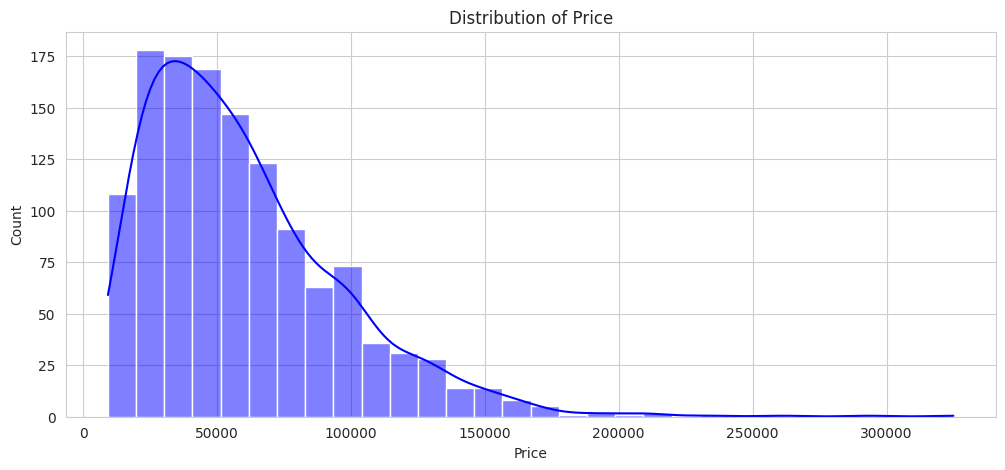

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 5))
sns.histplot(Laptop["Price"], bins=30, kde=True, color="blue")
plt.title("Distribution of Price")
plt.show()

<ipython-input-66-f89193983402>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Laptop["Company"], palette="pastel")


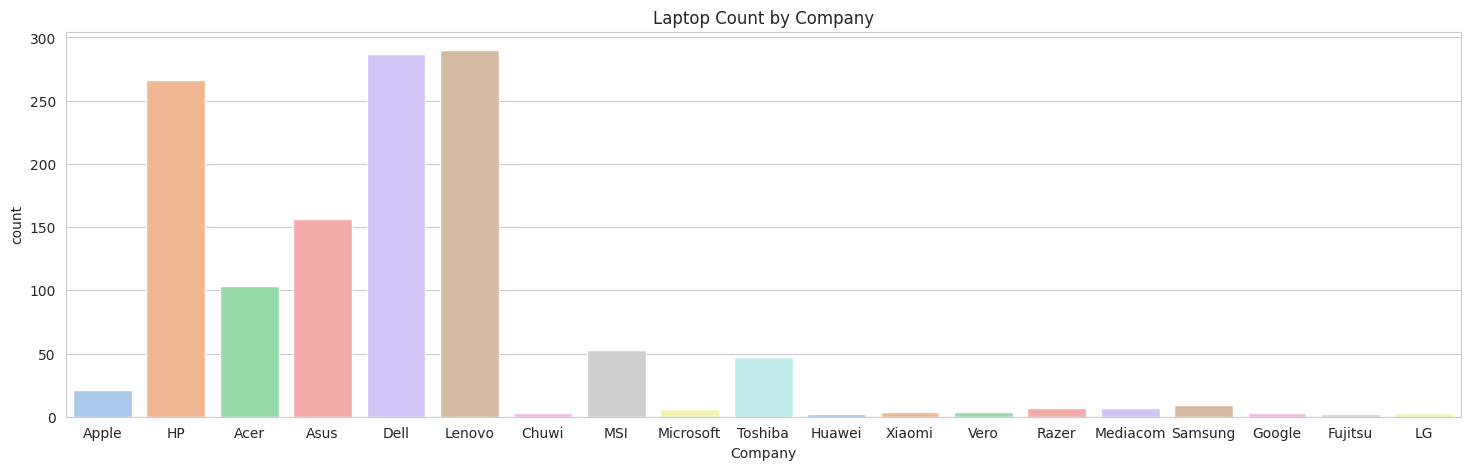

In [ ]:
plt.figure(figsize=(18, 5))
sns.countplot(x=Laptop["Company"], palette="pastel")
plt.title("Laptop Count by Company")
plt.show()

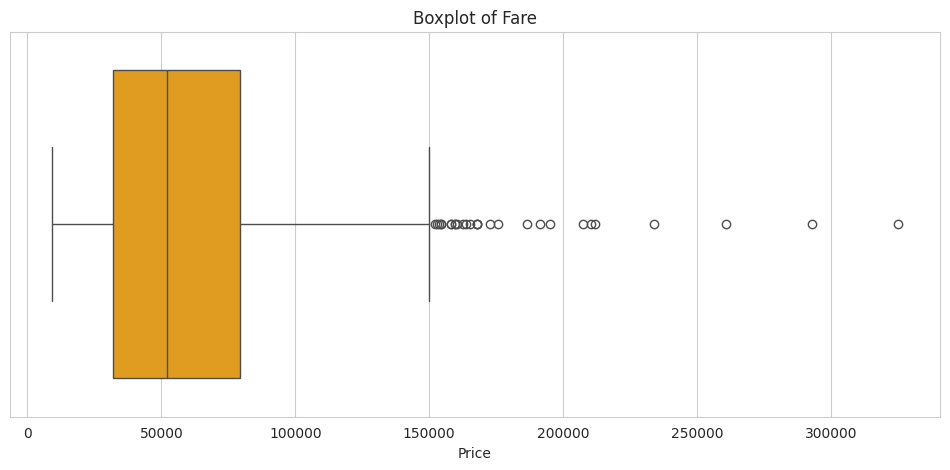

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=Laptop["Price"], color="orange")
plt.title("Boxplot of Fare")
plt.show()

# **4. Preprocessing**

In [ ]:
Laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1272 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1272 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(2), object(9)
memory usage: 109.5+ KB


In [ ]:
Laptop.isnull().sum()

,0
Company,0
TypeName,0
Inches,1
ScreenResolution,0
Cpu,0
Ram,0
Memory,1
Gpu,0
OpSys,0
Weight,1


# **4.1 Missing Value**

In [ ]:
Laptop["Inches"].fillna(Laptop["Inches"].mean(), inplace=True)
print(Laptop["Inches"].mean())

15.13081761006289


<ipython-input-70-5c7aff79b9bc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Laptop["Inches"].fillna(Laptop["Inches"].mean(), inplace=True)


In [ ]:
Laptop["Memory"].fillna(Laptop["Memory"].mode()[0], inplace=True)
print(Laptop["Memory"].mode()[0])

256GB SSD


<ipython-input-71-e293ec63cdd5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Laptop["Memory"].fillna(Laptop["Memory"].mode()[0], inplace=True)


In [ ]:
Laptop["Weight"].fillna(Laptop["Weight"].mode()[0], inplace=True)
print(Laptop["Weight"].mode()[0])

2.2kg


<ipython-input-72-4c094b0f855a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Laptop["Weight"].fillna(Laptop["Weight"].mode()[0], inplace=True)


# **4.2 Split**

In [ ]:
Laptop["MemorySize"] = Laptop["Memory"].apply(lambda x: x.split(" ")[0])
Laptop["MemoryKind"] = Laptop["Memory"].apply(lambda x: ' '.join(x.split(" ")[1:]))

# **4.3 Custom Transformer**

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
def DataExtractor(x):
  x["Ram"] = x["Ram"].apply(lambda x: x[:-2])
  x["Ram"] = x["Ram"].astype(int)

  x["Weight"] = x["Weight"].apply(lambda x: x[:-2])
  x["Weight"] = x["Weight"].astype(float)

  x["MemorySize"] = x["MemorySize"].replace("1.0TB", "1TB")
  x["MemorySize"] = x["MemorySize"].replace("1TB", "1024GB")
  x["MemorySize"] = x["MemorySize"].replace("2TB", "2048GB")

  x["MemorySize"] = x["MemorySize"].apply(lambda x: x[:-2])
  x["MemorySize"] = x["MemorySize"].astype(int)

  return x

In [ ]:
customtransformer = FunctionTransformer(DataExtractor, validate=False)

In [ ]:
customtransformer.transform(Laptop)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,MemorySize,MemoryKind
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128,SSD
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,128,Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,256,SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,512,SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,256,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,128,SSD
1269,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,512,SSD
1270,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,64,Flash Storage
1271,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,1024,HDD


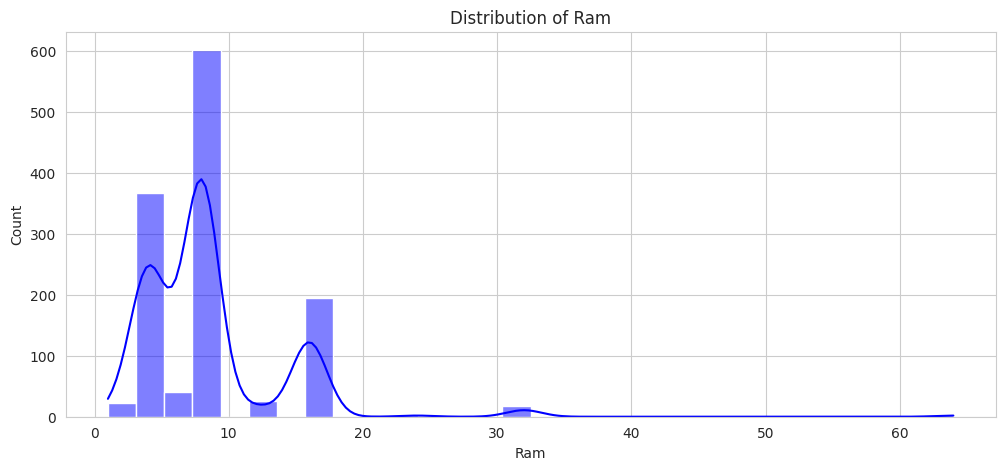

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 5))
sns.histplot(Laptop["Ram"], bins=30, kde=True, color="blue")
plt.title("Distribution of Ram")
plt.show()

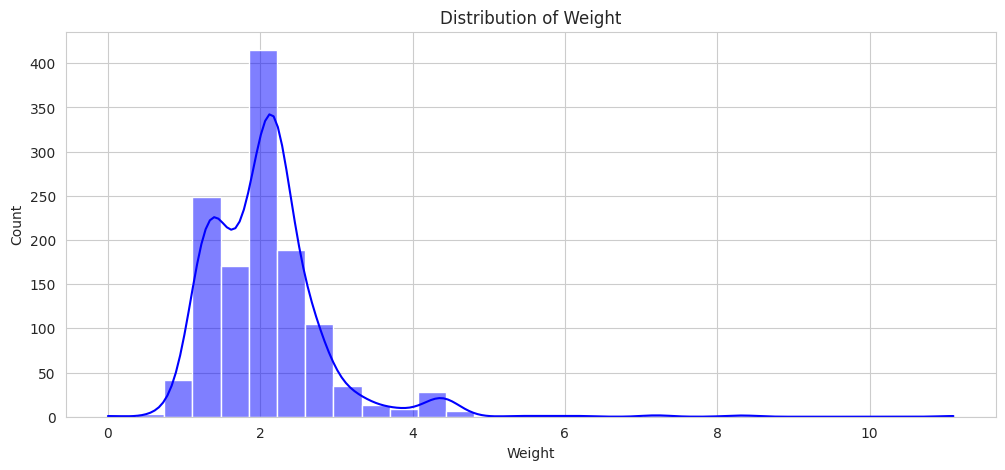

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 5))
sns.histplot(Laptop["Weight"], bins=30, kde=True, color="blue")
plt.title("Distribution of Weight")
plt.show()

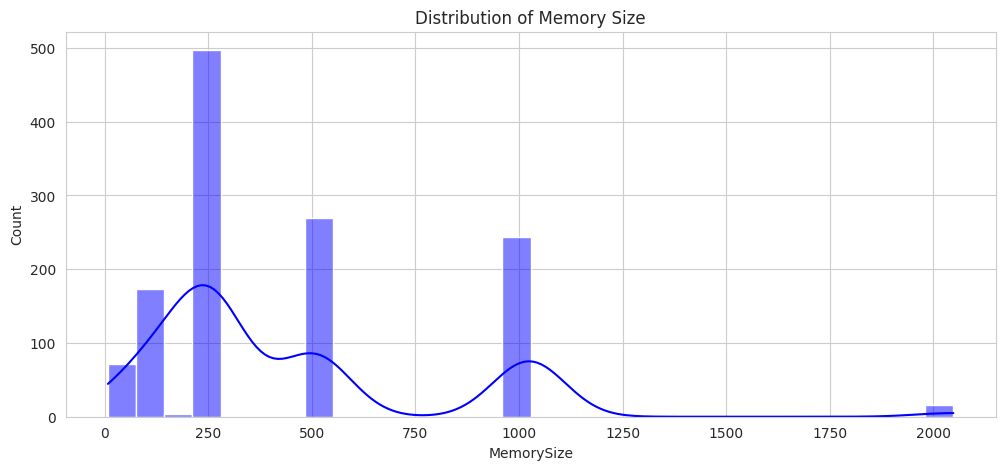

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 5))
sns.histplot(Laptop["MemorySize"], bins=30, kde=True, color="blue")
plt.title("Distribution of Memory Size")
plt.show()

# **4.4 Drop Col**

In [ ]:
Laptop.drop(["Memory"], axis=1, inplace=True)

# **4.5 Frequency Encoder**

In [ ]:
frequency_encoding = Laptop['Company'].value_counts()
Laptop['Company'] = Laptop['Company'].map(frequency_encoding)

# **4.6 LabelEncoder**

In [ ]:
le = LabelEncoder()
Laptop["ScreenResolution"] = le.fit_transform(Laptop["ScreenResolution"])
Laptop["Cpu"] = le.fit_transform(Laptop["Cpu"])
Laptop["Gpu"] = le.fit_transform(Laptop["Gpu"])
Laptop["MemoryKind"] = le.fit_transform(Laptop["MemoryKind"])

# **4.7 OneHotEncoder**

In [ ]:
Laptop = pd.get_dummies(Laptop, columns=["TypeName", "OpSys"])

# **4.8 MinMaxScaler**

In [ ]:
scaler = MinMaxScaler()
Laptop[["Company", "Inches", "ScreenResolution", "Cpu", "Ram", "Gpu", "Weight", "Price", "MemorySize", "MemoryKind"]] = scaler.fit_transform(Laptop[["Company", "Inches", "ScreenResolution", "Cpu", "Ram", "Gpu", "Weight", "Price", "MemorySize", "MemoryKind"]])

Laptop

,Company,Inches,ScreenResolution,Cpu,Ram,Gpu,Weight,Price,MemorySize,MemoryKind,...,TypeName_Workstation,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,0.065972,0.125490,0.589744,0.555556,0.111111,0.532110,0.123408,0.196741,0.058824,0.454545,...,False,False,False,False,False,False,False,False,False,True
1,0.065972,0.125490,0.025641,0.538462,0.111111,0.467890,0.120705,0.122353,0.058824,0.000000,...,False,False,False,False,False,False,False,False,False,True
2,0.916667,0.215686,0.205128,0.632479,0.111111,0.486239,0.167553,0.067679,0.121569,0.454545,...,False,False,False,False,False,True,False,False,False,False
3,0.065972,0.207843,0.641026,0.726496,0.238095,0.082569,0.164850,0.398895,0.247059,0.454545,...,False,False,False,False,False,False,False,False,False,True
4,0.065972,0.125490,0.589744,0.572650,0.111111,0.541284,0.123408,0.275038,0.121569,0.454545,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1.000000,0.152941,0.333333,0.760684,0.047619,0.431193,0.162147,0.078312,0.058824,0.454545,...,False,False,False,False,False,False,True,False,False,False
1269,1.000000,0.125490,0.487179,0.760684,0.238095,0.431193,0.117101,0.223629,0.247059,0.454545,...,False,False,False,False,False,False,True,False,False,False
1270,1.000000,0.152941,0.000000,0.290598,0.015873,0.366972,0.135120,0.009283,0.027451,0.000000,...,False,False,False,False,False,False,True,False,False,False
1271,0.916667,0.215686,0.000000,0.760684,0.079365,0.192661,0.197283,0.099578,0.498039,0.181818,...,False,False,False,False,False,False,True,False,False,False


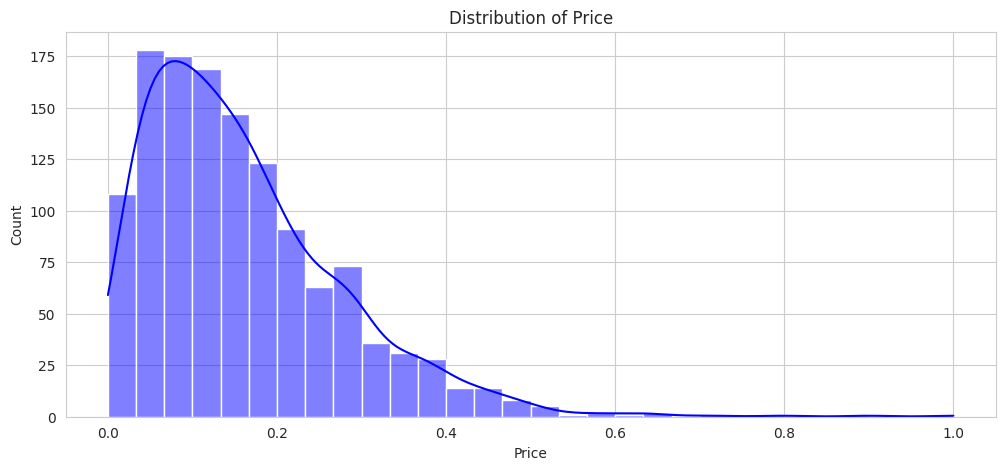

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 5))
sns.histplot(Laptop["Price"], bins=30, kde=True, color="blue")
plt.title("Distribution of Price")
plt.show()